<a href="https://colab.research.google.com/github/SaiGyani/OCR/blob/main/Copy_of_OCR_Basics_EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Install and Import Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install pytorch
#https://pytorch.org/get-started/locally/
# Install easyocr 
!pip install easyocr

     |████████████████████████████████| 63.6 MB 58 kB/s 
     |████████████████████████████████| 47.6 MB 1.5 MB/s 


In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

## 1. Read in images or video

In [ ]:
IMAGE_PATH = '/content/drive/MyDrive/Colab Notebooks/EasyOCR-main/Asiah.png'
#IMAGE_PATH = 'surf.jpeg'

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[97, 91], [389, 91], [389, 205], [97, 205]], 'Asiah', 0.9982948034468343)]

## 2. Draw Results 

In [ ]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

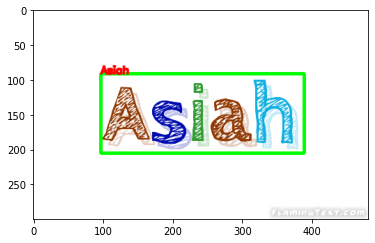

In [ ]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,0,0),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

## 3. Handling Multiple Lines

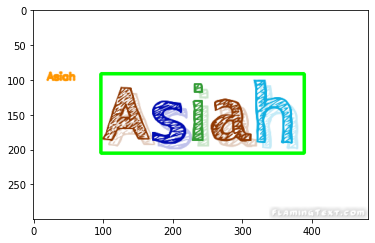

In [ ]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(255,150,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()